In [1]:
## Set Python - Spark environment.
import os
import sys
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

## Create SparkContext, SparkSession
import pyspark
from pyspark.conf import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

conf = SparkConf().setAppName("Python_Spark_PHD_Complete").setMaster('local')
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''from pyspark.sql.types import *
## Define Schema
DataSchema = StructType([
         StructField("date", DateType(), True),
         StructField("Appliances", DoubleType(), True),
         StructField("lights", DoubleType(), True),
         StructField("T1", DoubleType(), True),
         StructField("RH_1", DoubleType(), True),
         StructField("T2", DoubleType(), True),
         StructField("RH_2", DoubleType(), True),
         StructField("T3", DoubleType(), True),        
         StructField("RH_3", DoubleType(), True),
         StructField("T4", DoubleType(), True),
         StructField("RH_4", DoubleType(), True),
         StructField("T5", DoubleType(), True),
         StructField("RH_5", DoubleType(), True),
         StructField("T6", DoubleType(), True),
         StructField("RH_6", DoubleType(), True),
         StructField("T7", DoubleType(), True),
         StructField("RH_7", DoubleType(), True),
         StructField("T8", DoubleType(), True),
         StructField("RH_8", DoubleType(), True),
         StructField("T9", DoubleType(), True),
         StructField("RH_9", DoubleType(), True),
         StructField("TO", DoubleType(), True),
         StructField("Press_mm_hg", DoubleType(), True),
         StructField("RH_out", DoubleType(), True),
         StructField("Wind speed", DoubleType(), True),
         StructField("Visibility", DoubleType(), True),
         StructField("Tdewpoint", DoubleType(), True),
         StructField("rv1", DoubleType(), True),
         StructField("rv2", DoubleType(), True),
         StructField("nsm", DoubleType(), True),
         StructField("weekstatus", StringType(), True),
         StructField("Day_of_week", StringType(), True)])'''

In [137]:
## Read data and create a dataframe
playstor_data= spark.read.format("csv")\
       .option("header", "true")\
       .option("inferSchema", "true")\
       .option("delimiter", "+")\
       .option("delimiter", "\t")\
       .load("/user/2383B49/PHD/data/FlumeData.*")
playstor_data1=spark.read.parquet("/user/2383B49/PHD_Bigdata2/results/output/*.parquet")


In [138]:
playstor_data.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



In [139]:
playstor_data1.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- ContentRating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- LastUpdated: string (nullable = true)
 |-- CurrentVer: string (nullable = true)
 |-- AndroidVer: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)



4.Check the number of rows and columns in the dataframe created in steps 2 and 3.

In [140]:
## To Count the number of rows in DataFrame
print('Total Playstore records count is {}'.format(playstor_data.count()))
## Columns count and column names
print("Total Playstore Columns count is {}".format(len(playstor_data.columns)))
print("\n\n Playstore Columns are: {} \n".format(playstor_data.columns))

## To Count the number of rows in DataFrame
print('Total Playstore1 records count is {}'.format(playstor_data1.count()))
## Columns count and column names
print("Total Playstore1 Columns count is {}".format(len(playstor_data1.columns)))
print("\n\n Playstore1 Columns are: {} \n".format(playstor_data1.columns))


Total Playstore records count is 5421
Total Playstore Columns count is 13


 Playstore Columns are: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

Total Playstore1 records count is 5420
Total Playstore1 Columns count is 14


 Playstore1 Columns are: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer', 'AndroidVer', 'timestamp'] 



In [147]:
playstor_data.show(2)

+--------------------+--------+------+-------+----+----------+----+-----+--------------+------+------------+-----------+------------+
|                 App|Category|Rating|Reviews|Size|  Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver| Android Ver|
+--------------------+--------+------+-------+----+----------+----+-----+--------------+------+------------+-----------+------------+
|Tennis Champion 3...|  SPORTS|   4.0| 170973| 43M|5,000,000+|Free|    0|      Everyone|Sports|June 6, 2018|        2.1|  4.1 and up|
|Carnivores: Dinos...|    GAME|   4.2|  62636| 17M|1,000,000+|Free|    0|          Teen|Action|July 2, 2018|      1.8.0|4.0.3 and up|
+--------------------+--------+------+-------+----+----------+----+-----+--------------+------+------------+-----------+------------+
only showing top 2 rows



In [155]:
playstor_data1.show(2)

+--------------------+--------------+------+-------+----+--------+----+-----+-------------+--------------------+----------------+----------+------------+
|                 App|      Category|Rating|Reviews|Size|Installs|Type|Price|ContentRating|              Genres|     LastUpdated|CurrentVer|  AndroidVer|
+--------------------+--------------+------+-------+----+--------+----+-----+-------------+--------------------+----------------+----------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M| 10,000+|Free|    0|     Everyone|        Art & Design| January 7, 2018|     1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|500,000+|Free|    0|     Everyone|Art & Design;Pret...|January 15, 2018|     2.0.0|4.0.3 and up|
+--------------------+--------------+------+-------+----+--------+----+-----+-------------+--------------------+----------------+----------+------------+
only showing top 2 rows



In [149]:
#Drop timestamp column from Playstor1 data
playstor_data1=playstor_data1.drop("timestamp")

In [150]:
## To Count the number of rows in DataFrame
print('Total Playstore records count is {}'.format(playstor_data.count()))
## Columns count and column names
print("Total Playstore Columns count is {}".format(len(playstor_data.columns)))
print("\n\n Playstore Columns are: {} \n".format(playstor_data.columns))

## To Count the number of rows in DataFrame
print('Total Playstore1 records count is {}'.format(playstor_data1.count()))
## Columns count and column names
print("Total Playstore1 Columns count is {}".format(len(playstor_data1.columns)))
print("\n\n Playstore1 Columns are: {} \n".format(playstor_data1.columns))


Total Playstore records count is 5421
Total Playstore Columns count is 13


 Playstore Columns are: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

Total Playstore1 records count is 5420
Total Playstore1 Columns count is 13


 Playstore1 Columns are: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer', 'AndroidVer'] 



5.Combine the 2 dataframes in to a single dataframe.

In [335]:
#joining the above three product, customer, order dataframes
Playstore_data = playstor_data.unionAll(playstor_data1) 

6.Print number of rows and columns of the merged dataframe.

In [336]:
## To Count the number of rows in DataFrame
print('Total Playstore records count is {}'.format(Playstore_data.count()))
## Columns count and column names
print("Total Playstore Columns count is {}".format(len(Playstore_data.columns)))
print("\n\n Playstore Columns are: {} \n".format(Playstore_data.columns))


Total Playstore records count is 10841
Total Playstore Columns count is 13


 Playstore Columns are: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 



7.Print the Summary for “Size, Installs, Price” columns. Print the datatypes for the columns.

In [337]:
## Verify summary stats for few fields
Playstore_data.describe().select('Size', 'Installs', 'Price').show()

+------------------+--------+--------+
|              Size|Installs|   Price|
+------------------+--------+--------+
|             10841|   10841|   10841|
|              null|     0.0|     0.0|
|              null|     NaN|     0.0|
|            1,000+|       0|   $0.99|
|Varies with device|    Free|Everyone|
+------------------+--------+--------+



In [338]:
Playstore_data.toPandas().head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Tennis Champion 3D - Online Sports Game,SPORTS,4.0,170973,43M,"5,000,000+",Free,0,Everyone,Sports,"June 6, 2018",2.1,4.1 and up
1,Carnivores: Dinosaur Hunter,GAME,4.2,62636,17M,"1,000,000+",Free,0,Teen,Action,"July 2, 2018",1.8.0,4.0.3 and up
2,High School Simulator 2017,FAMILY,4.2,123136,80M,"5,000,000+",Free,0,Mature 17+,Simulation,"June 25, 2018",1.0,4.0 and up
3,Hopeless Land: Fight for Survival,GAME,4.2,250197,44M,"5,000,000+",Free,0,Teen,Action,"July 12, 2018",1.0,4.1 and up
4,SofaScore Live Score,SPORTS,4.8,221722,Varies with device,"10,000,000+",Free,0,Everyone,Sports,"July 26, 2018",Varies with device,Varies with device


8.Print the distinct values for Size column

In [339]:
from pyspark.sql.functions import col, countDistinct

Playstore_data.agg(countDistinct(col('Size')).alias('Size')).collect()

[Row(Size=462)]

In [340]:
#Playstore_data.select('Size').distinct().collect()

In [341]:
dfWithCount = Playstore_data.groupBy("Size").agg(count("Size").alias("itemCount")).sort(desc('itemCount'))
dfWithCount.show()

+------------------+---------+
|              Size|itemCount|
+------------------+---------+
|Varies with device|     1695|
|               11M|      198|
|               12M|      196|
|               14M|      194|
|               13M|      191|
|               15M|      184|
|               17M|      160|
|               19M|      154|
|               26M|      149|
|               16M|      149|
|               25M|      143|
|               20M|      139|
|               21M|      138|
|               24M|      136|
|               10M|      136|
|               18M|      133|
|               23M|      117|
|               22M|      114|
|               29M|      103|
|               27M|       97|
+------------------+---------+
only showing top 20 rows



In [342]:
Playstore_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Playstore_data.columns]).show()

+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|  1167|      0|   0|       0|   1|    0|             1|     0|           0|          6|          1|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+



In [343]:
Playstore_data = Playstore_data.withColumn("Rating", Playstore_data["Rating"].cast("double"))

9.Replace “” with the None for the below columns
Rating
CurrentVer
AndroidVer

In [344]:
from pyspark.sql.functions import col, when

#Writing function for replacing blacks with Null
def blank_as_null(x):
    return when(col(x) != "", col(x)).otherwise(None)

to_convert = set(["Rating","Current Ver","Android Ver"]) # Some set of columns

reduce(lambda Playstore_data, x: Playstore_data.withColumn(x, blank_as_null(x)), to_convert, Playstore_data)

#Playstore_data =Playstore_data.select(when(col("Rating") != "", col("Rating")).otherwise(None))

DataFrame[App: string, Category: string, Rating: double, Reviews: string, Size: string, Installs: string, Type: string, Price: string, Content Rating: string, Genres: string, Last Updated: string, Current Ver: string, Android Ver: string]

10.Print the Null values for each column

In [345]:
Playstore_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Playstore_data.columns]).show()

+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|  1474|      0|   0|       0|   1|    0|             1|     0|           0|          6|          1|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+



In [346]:
Playstore_data.toPandas().head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Tennis Champion 3D - Online Sports Game,SPORTS,4.0,170973,43M,"5,000,000+",Free,0,Everyone,Sports,"June 6, 2018",2.1,4.1 and up
1,Carnivores: Dinosaur Hunter,GAME,4.2,62636,17M,"1,000,000+",Free,0,Teen,Action,"July 2, 2018",1.8.0,4.0.3 and up
2,High School Simulator 2017,FAMILY,4.2,123136,80M,"5,000,000+",Free,0,Mature 17+,Simulation,"June 25, 2018",1.0,4.0 and up


11.Remove the alphabet characters in Size column.

In [355]:
Playstore_data = Playstore_data.withColumn("Size", regexp_replace("Size", 'M', ""))
Playstore_data = Playstore_data.withColumn("Size", regexp_replace("Size", 'k', ""))
Playstore_data= Playstore_data.withColumn("Size", when(Playstore_data["Size"]== "Varies with device", 0).otherwise(Playstore_data["Size"]))

#Playstore_data = Playstore_data.withColumn("Size", regexp_replace("Size", "Varies with device", 0))
Playstore_data.show(3)

+--------------------+--------+------+-------+----+----------+----+-----+--------------+----------+-------------+-----------+------------+
|                 App|Category|Rating|Reviews|Size|  Installs|Type|Price|Content Rating|    Genres| Last Updated|Current Ver| Android Ver|
+--------------------+--------+------+-------+----+----------+----+-----+--------------+----------+-------------+-----------+------------+
|Tennis Champion 3...|  SPORTS|   4.0| 170973|  43|5,000,000+|Free|    0|      Everyone|    Sports| June 6, 2018|        2.1|  4.1 and up|
|Carnivores: Dinos...|    GAME|   4.2|  62636|  17|1,000,000+|Free|    0|          Teen|    Action| July 2, 2018|      1.8.0|4.0.3 and up|
|High School Simul...|  FAMILY|   4.2| 123136|  80|5,000,000+|Free|    0|    Mature 17+|Simulation|June 25, 2018|        1.0|  4.0 and up|
+--------------------+--------+------+-------+----+----------+----+-----+--------------+----------+-------------+-----------+------------+
only showing top 3 rows



In [360]:
dfWithCount = Playstore_data.groupBy("Size").agg(count("Size").alias("itemCount")).sort(desc('itemCount'))
dfWithCount.show(10)

+----+---------+
|Size|itemCount|
+----+---------+
|   0|     1695|
|  11|      199|
|  12|      196|
|  14|      195|
|  13|      191|
|  15|      184|
|  17|      162|
|  19|      154|
|  26|      151|
|  16|      149|
+----+---------+
only showing top 10 rows



12.Remove the “+” and “,” from the Installs column. Check by printing the contents of the column.

In [361]:
Playstore_data = Playstore_data.withColumn("Installs", regexp_replace("Installs", "[+,]", ""))
Playstore_data.show(3)

+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|                 App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|    Genres| Last Updated|Current Ver| Android Ver|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|Tennis Champion 3...|  SPORTS|   4.0| 170973|  43| 5000000|Free|    0|      Everyone|    Sports| June 6, 2018|        2.1|  4.1 and up|
|Carnivores: Dinos...|    GAME|   4.2|  62636|  17| 1000000|Free|    0|          Teen|    Action| July 2, 2018|      1.8.0|4.0.3 and up|
|High School Simul...|  FAMILY|   4.2| 123136|  80| 5000000|Free|    0|    Mature 17+|Simulation|June 25, 2018|        1.0|  4.0 and up|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
only showing top 3 rows



13.Print the distinct values and the number of rows for each distinct values for the below columns.
Type
Price
Content Rating

In [362]:
dfWithCount = Playstore_data.groupBy("Price").agg(count("Price").alias("itemCount")).sort(desc('itemCount'))
dfWithCount.show()


+-------+---------+
|  Price|itemCount|
+-------+---------+
|      0|    10040|
|  $0.99|      148|
|  $2.99|      129|
|  $1.99|       73|
|  $4.99|       72|
|  $3.99|       63|
|  $1.49|       46|
|  $5.99|       30|
|  $2.49|       26|
|  $9.99|       21|
|  $6.99|       13|
|$399.99|       12|
| $14.99|       11|
|  $4.49|        9|
| $24.99|        7|
|  $3.49|        7|
|  $7.99|        7|
| $29.99|        7|
| $19.99|        6|
|  $5.49|        6|
+-------+---------+
only showing top 20 rows



In [363]:
dfWithCount = Playstore_data.groupBy("Content Rating").agg(count("Content Rating").alias("itemCount")).sort(desc('itemCount'))
dfWithCount.show()


+---------------+---------+
| Content Rating|itemCount|
+---------------+---------+
|       Everyone|     8714|
|           Teen|     1208|
|     Mature 17+|      499|
|   Everyone 10+|      414|
|Adults only 18+|        3|
|        Unrated|        2|
|           null|        0|
+---------------+---------+



In [364]:
#Displaying distict values and item row count for Type column
dfWithCount = Playstore_data.groupBy("Type").agg(count("Type").alias("itemCount")).sort(desc('itemCount'))
dfWithCount.show()


+----+---------+
|Type|itemCount|
+----+---------+
|Free|    10039|
|Paid|      800|
|   0|        1|
|null|        0|
+----+---------+



14.Replace the “2509” and “0” in Type column to None, if they are present.

In [365]:
#As by above result there is no 2509 value in Type column so checking only for 0
from pyspark.sql.functions import col, when
Playstore_data= Playstore_data.withColumn("Type", when(Playstore_data["Type"]== 0, None).otherwise(Playstore_data["Type"]))
Playstore_data.show(3)


+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|                 App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|    Genres| Last Updated|Current Ver| Android Ver|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|Tennis Champion 3...|  SPORTS|   4.0| 170973|  43| 5000000|Free|    0|      Everyone|    Sports| June 6, 2018|        2.1|  4.1 and up|
|Carnivores: Dinos...|    GAME|   4.2|  62636|  17| 1000000|Free|    0|          Teen|    Action| July 2, 2018|      1.8.0|4.0.3 and up|
|High School Simul...|  FAMILY|   4.2| 123136|  80| 5000000|Free|    0|    Mature 17+|Simulation|June 25, 2018|        1.0|  4.0 and up|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
only showing top 3 rows



In [366]:
Playstore_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Playstore_data.columns]).show()

+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|  1474|      0|   0|       0|   2|    0|             1|     0|           0|          6|          1|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+



15.Change Free to 0 and Paid to 1 in Type column.

In [367]:
from pyspark.sql.functions import col, when
Playstore_data= Playstore_data.withColumn("Type", when(Playstore_data["Type"]== "Free", 0).otherwise(Playstore_data["Type"]))
Playstore_data.show(3)


+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|                 App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|    Genres| Last Updated|Current Ver| Android Ver|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|Tennis Champion 3...|  SPORTS|   4.0| 170973|  43| 5000000|   0|    0|      Everyone|    Sports| June 6, 2018|        2.1|  4.1 and up|
|Carnivores: Dinos...|    GAME|   4.2|  62636|  17| 1000000|   0|    0|          Teen|    Action| July 2, 2018|      1.8.0|4.0.3 and up|
|High School Simul...|  FAMILY|   4.2| 123136|  80| 5000000|   0|    0|    Mature 17+|Simulation|June 25, 2018|        1.0|  4.0 and up|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
only showing top 3 rows



In [368]:
from pyspark.sql.functions import col, when
Playstore_data= Playstore_data.withColumn("Type", when(Playstore_data["Type"]== "Paid", 1).otherwise(Playstore_data["Type"]))
Playstore_data.show(3)


+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|                 App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|    Genres| Last Updated|Current Ver| Android Ver|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|Tennis Champion 3...|  SPORTS|   4.0| 170973|  43| 5000000|   0|    0|      Everyone|    Sports| June 6, 2018|        2.1|  4.1 and up|
|Carnivores: Dinos...|    GAME|   4.2|  62636|  17| 1000000|   0|    0|          Teen|    Action| July 2, 2018|      1.8.0|4.0.3 and up|
|High School Simul...|  FAMILY|   4.2| 123136|  80| 5000000|   0|    0|    Mature 17+|Simulation|June 25, 2018|        1.0|  4.0 and up|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
only showing top 3 rows



In [369]:
#Displaying distict values and item row count for Type column
dfWithCount = Playstore_data.groupBy("Type").agg(count("Type").alias("itemCount")).sort(desc('itemCount'))
dfWithCount.show()


+----+---------+
|Type|itemCount|
+----+---------+
|   0|    10039|
|   1|      800|
|null|        0|
+----+---------+



16.Impute the NA values only in Type column with 0.

In [370]:
from pyspark.sql.functions import col, when
Playstore_data= Playstore_data.withColumn("Type", when(Playstore_data["Type"].isNull(), 0).otherwise(Playstore_data["Type"]))
Playstore_data.show(3)


+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|                 App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|    Genres| Last Updated|Current Ver| Android Ver|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
|Tennis Champion 3...|  SPORTS|   4.0| 170973|  43| 5000000|   0|    0|      Everyone|    Sports| June 6, 2018|        2.1|  4.1 and up|
|Carnivores: Dinos...|    GAME|   4.2|  62636|  17| 1000000|   0|    0|          Teen|    Action| July 2, 2018|      1.8.0|4.0.3 and up|
|High School Simul...|  FAMILY|   4.2| 123136|  80| 5000000|   0|    0|    Mature 17+|Simulation|June 25, 2018|        1.0|  4.0 and up|
+--------------------+--------+------+-------+----+--------+----+-----+--------------+----------+-------------+-----------+------------+
only showing top 3 rows



In [371]:
Playstore_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Playstore_data.columns]).show()

+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|  1474|      0|   0|       0|   0|    0|             1|     0|           0|          6|          1|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+



17.Remove the “$” symbol from Price column.

In [372]:
Playstore_data = Playstore_data.withColumn("Price", regexp_replace("Installs", "[$]", ""))
Playstore_data.show(3)

+--------------------+--------+------+-------+----+--------+----+-------+--------------+----------+-------------+-----------+------------+
|                 App|Category|Rating|Reviews|Size|Installs|Type|  Price|Content Rating|    Genres| Last Updated|Current Ver| Android Ver|
+--------------------+--------+------+-------+----+--------+----+-------+--------------+----------+-------------+-----------+------------+
|Tennis Champion 3...|  SPORTS|   4.0| 170973|  43| 5000000|   0|5000000|      Everyone|    Sports| June 6, 2018|        2.1|  4.1 and up|
|Carnivores: Dinos...|    GAME|   4.2|  62636|  17| 1000000|   0|1000000|          Teen|    Action| July 2, 2018|      1.8.0|4.0.3 and up|
|High School Simul...|  FAMILY|   4.2| 123136|  80| 5000000|   0|5000000|    Mature 17+|Simulation|June 25, 2018|        1.0|  4.0 and up|
+--------------------+--------+------+-------+----+--------+----+-------+--------------+----------+-------------+-----------+------------+
only showing top 3 rows



18.Remove records if there are null values in any of the rows and check the size of the dataframe.

In [373]:
from pyspark.sql.functions import col, when
for col in Playstore_data.columns:
    Playstore_data= Playstore_data.filter(Playstore_data[col].isNotNull())

In [374]:
from pyspark.sql.functions import col, when

Playstore_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Playstore_data.columns]).show()

+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|     0|      0|   0|       0|   0|    0|             0|     0|           0|          0|          0|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+



In [375]:
## To Count the number of rows in DataFrame
print('Total Playstore records count is {}'.format(Playstore_data.count()))
## Columns count and column names
print("Total Playstore Columns count is {}".format(len(Playstore_data.columns)))
print("\n\n Playstore Columns are: {} \n".format(Playstore_data.columns))


Total Playstore records count is 9364
Total Playstore Columns count is 13


 Playstore Columns are: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 



19.Draw a histogram plot for Genres and Content Rating

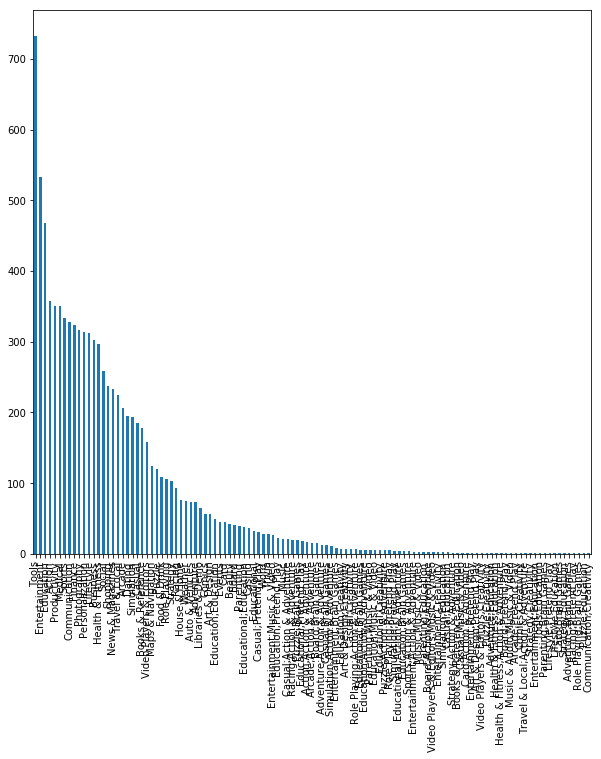

In [376]:
Playstore_data.toPandas()["Genres"].value_counts().plot(kind='bar', figsize = (10,10))

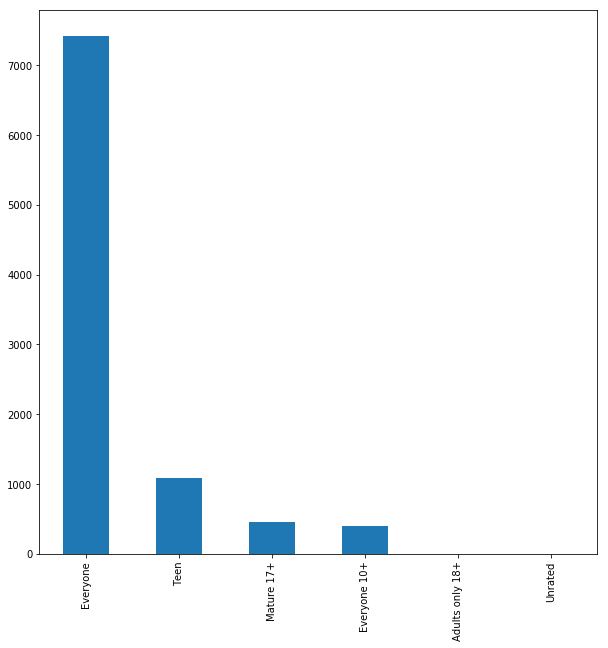

In [377]:
'''import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,8))
b = sns.barplot(Playstore_data.select("Genres"))
b.set_title('Histogram of Genres',fontsize = 16)
b.set_xlabel("Genres",fontsize=14)
plt.show()'''

Playstore_data.toPandas()["Content Rating"].value_counts().plot(kind='bar', figsize = (10,10))

20.Drop the below columns
App
LastUpdated
CurrentVer
AndroidVer
Genres

In [419]:
Playstore_data_new= Playstore_data.select([c for c in Playstore_data.columns if c not in { "App", "Last Updated", "Current Ver", "Android Ver", "Genres"}])

In [420]:
Playstore_data_new.printSchema()

root
 |-- Category: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)



21.Print the count of distinct values for all the columns using loop.

In [421]:
from pyspark.sql.functions import col, countDistinct

Playstore_data_new.agg(*(countDistinct(col(c)).alias(c) for c in Playstore_data_new.columns)).show()

+--------+------+-------+----+--------+----+-----+--------------+
|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|
+--------+------+-------+----+--------+----+-----+--------------+
|      33|    39|   5991| 378|      19|   2|   19|             6|
+--------+------+-------+----+--------+----+-----+--------------+



22.Print Summary of all the columns.

In [422]:
Playstore_data_new.describe().show()

+-------+--------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------+
|summary|      Category|            Rating|           Reviews|              Size|           Installs|              Type|              Price| Content Rating|
+-------+--------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------+
|  count|          9364|              9364|              9364|              9364|               9364|              9364|               9364|           9364|
|   mean|          null| 4.191777018368222| 514159.1819735156|30.772031183255017|1.790120759696711E7|0.0689876121315677|1.790120759696711E7|           null|
| stddev|          null|0.5152700645201685|3144368.9988012323| 86.12547785036206|9.124759777743632E7|0.2534466044464957|9.124759777743632E7|           null|
|    min|ART_AND_DESIGN|               1.0|               

23.Type cast all the numerical columns to double type and categorical columns to String type. NOTE: Rating column is the Target Variable.

In [423]:
Playstore_data_new.toPandas().head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,SPORTS,4.0,170973,43,5000000,0,5000000,Everyone
1,GAME,4.2,62636,17,1000000,0,1000000,Teen
2,FAMILY,4.2,123136,80,5000000,0,5000000,Mature 17+
3,GAME,4.2,250197,44,5000000,0,5000000,Teen
4,SPORTS,4.8,221722,0,10000000,0,10000000,Everyone


In [424]:
#Datatypes changing into appropriate columns

In [425]:
num_vars= ["Rating","Reviews", "Size","Installs", "Type", "Price"]
for col_name in num_vars:
    Playstore_data_new = Playstore_data_new.withColumn(col_name, col(col_name).cast('float'))


In [426]:
Playstore_data_new = Playstore_data_new.withColumn(col_name, col(col_name).cast('float'))



In [427]:
Playstore_data_new.printSchema()

root
 |-- Category: string (nullable = true)
 |-- Rating: float (nullable = true)
 |-- Reviews: float (nullable = true)
 |-- Size: float (nullable = true)
 |-- Installs: float (nullable = true)
 |-- Type: float (nullable = true)
 |-- Price: float (nullable = true)
 |-- Content Rating: string (nullable = true)



24.Split the data into training data and test data

In [418]:
(trainingData, testData) = Playstore_data_new.randomSplit([0.7, 0.3])

25.Using Spark ML pipeline, build atleast 2 regression models and Tune the models. HINT: Use setHandleInvalid(“Keep”).

In [467]:
cat_Var_Names= ["Category", "Content Rating"]
num_Var_Names= ["Reviews", "Size","Installs", "Type", "Price"]
Target= ["Rating"]

In [468]:
#Vector Assembler

In [469]:
from pyspark.ml.feature import VectorAssembler
vector_assembler_NumVars = VectorAssembler(inputCols=num_Var_Names, outputCol="num_features_all")

### Min-max scaling

In [470]:
### Min-max scaling

from pyspark.ml.feature import MinMaxScaler
min_Max_Scalar_NumVars = MinMaxScaler(inputCol="num_features_all", outputCol = "scaled_num_features")

In [471]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

assembler = VectorAssembler(inputCols=["scaled_num_features"], outputCol="features")

In [472]:
#Encoding Target variable

In [473]:
indexer_Label = StringIndexer(inputCol="Target", outputCol="label")

In [474]:
#Preprocessing steps

In [491]:
### converting categorical intp numeric
from pyspark.ml.feature import OneHotEncoder, StringIndexer

indexers_Cat  = [StringIndexer(inputCol=cat_Var_Name, outputCol="{0}_index".format(cat_Var_Name)).setHandleInvalid("keep") 
                 for cat_Var_Name in cat_Var_Names ] ### constructing list of string indexer

encoders_Cat  = [OneHotEncoder(inputCol=indexer.getOutputCol(), 
                               outputCol="{0}_vec".format(indexer.getInputCol())) 
                 for indexer in indexers_Cat]  ### doing onehot encoder.

assembler_Cat = VectorAssembler(inputCols=[encoder.getOutputCol() 
                                           for encoder in encoders_Cat], outputCol="cat_features") ### features considering categorical variables

assembler     = VectorAssembler(inputCols=["scaled_num_features","cat_features"], outputCol="features")

In [492]:
#Preprocessing steps

In [493]:
preprocessiong_Stages = [vector_assembler_NumVars] +\
                        [min_Max_Scalar_NumVars] +\
                        indexers_Cat + encoders_Cat +\
                        [assembler_Cat] +\
                        [assembler] 

In [494]:
#linear regression

In [495]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(maxIter=100,labelCol="Rating",featuresCol="features")

In [496]:
from pyspark.ml import Pipeline

lr_Pipeline = Pipeline(stages=preprocessiong_Stages+[lr])

lr_Pipeline_model = lr_Pipeline.fit(trainingData)

In [497]:
train_predictions_lr = lr_Pipeline_model.transform(training_data)
actual_test_predictions_lr = lr_Pipeline_model.transform(test_data)


NameError: name 'training_data' is not defined

In [ ]:
# Find the error metric - RMSE
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="Rating",
                            predictionCol="prediction",
                            metricName="rmse" )


In [ ]:
lmRegTrain_rmse = evaluator.evaluate(train_predictions_lr)
print('RMSE value on Train data is', lmRegTrain_rmse)

'''lmRegTest_rmse = evaluator.evaluate(test_predictions_lr)
print('RMSE value on Test data is', lmRegTest_rmse)'''

In [ ]:
#Decision Tree Regressor

In [ ]:
Decision Tree Regressor

In [498]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(labelCol="Rating", featuresCol="features")

In [499]:
dt_Pipeline = Pipeline(stages=preprocessiong_Stages+[dt]) 

dt_Pipeline_model = dt_Pipeline.fit(trainingData)

In [500]:
train_predictions_dt = dt_Pipeline_model.transform(trainingData)
test_predictions_dt = dt_Pipeline_model.transform(testData)

In [501]:
# Find the error metric - RMSE
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="Rating",
                            predictionCol="prediction",
                            metricName="rmse" )


In [502]:
dtTrain_rmse = evaluator.evaluate(train_predictions_dt)
print('RMSE value on Train data is', dtTrain_rmse)

dtTest_rmse = evaluator.evaluate(test_predictions_dt)
print('RMSE value on Test data is', dtTest_rmse)

('RMSE value on Train data is', 0.4803046581524253)
('RMSE value on Test data is', 0.48964650325527187)


In [503]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGridDT = ParamGridBuilder()\
    .addGrid(dt.maxDepth, [1,6,10]) \
    .build()
    
dt_crossval = CrossValidator(estimator=dt_Pipeline,
                             estimatorParamMaps=paramGridDT,
                             evaluator=RegressionEvaluator(labelCol="Rating"),
                             numFolds=2) 

In [504]:
# Run cross-validation, and choose the best set of parameters.
dt_crossval_Model = dt_crossval.fit(trainingData)

In [505]:
train_predictions_dtcv = dt_crossval_Model.transform(trainingData)
test_predictions_dtcv = dt_crossval_Model.transform(testData)

In [506]:
dtTrain_rmsecv = evaluator.evaluate(train_predictions_dtcv)
print('RMSE value on Train data is', dtTrain_rmsecv)

dtTest_rmsecv = evaluator.evaluate(test_predictions_dtcv)
print('RMSE value on Test data is', dtTest_rmsecv)

('RMSE value on Train data is', 0.4727165869890867)
('RMSE value on Test data is', 0.4895515520119714)


In [507]:
#RANDOM-FOREST

In [508]:
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(labelCol="Rating", featuresCol="features")

In [509]:
rf_Pipeline = Pipeline(stages=preprocessiong_Stages+[rf]) 

rf_Pipeline_model = rf_Pipeline.fit(trainingData)

In [510]:
train_predictions_rf = rf_Pipeline_model.transform(trainingData)
test_predictions_rf = rf_Pipeline_model.transform(testData)

In [511]:
rfTrain_rmse = evaluator.evaluate(train_predictions_rf)
print('RMSE value on Train data is', rfTrain_rmse)

rfTest_rmse = evaluator.evaluate(test_predictions_rf)
print('RMSE value on Test data is', rfTest_rmse)

('RMSE value on Train data is', 0.4805342390505242)
('RMSE value on Test data is', 0.48567026466500374)
